In [70]:
%%javascript
require.config({paths: {toc: "//rawgit.com/rweigel/js-rsw/master/jupyter/toc"}});require(["toc"]);

<IPython.core.display.Javascript object>

In [55]:
from hapiclient.hapi import hapi
from hapiclient.hapiplot import hapiplot
%matplotlib inline

# List all servers

In [71]:
servers = hapi(logging=True) # servers is an array of URLs
print('')

Reading https://github.com/hapi-server/servers/raw/master/all.txt ... Done.
List of HAPI servers in https://github.com/hapi-server/servers/raw/master/all.txt:
   http://hapi-server.org/servers/TestData/hapi
   http://hapi-server.org/servers/SSCWeb/hapi
   http://datashop.elasticbeanstalk.com/hapi
   https://cdaweb.gsfc.nasa.gov/hapi
   http://planet.physics.uiowa.edu/das/das2Server/hapi
   https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi



# SSCWeb data

Writing /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSEY_GSEZ_GSE.json ... Done.
Saving http://hapi-server.org/servers/SSCWeb/hapi/data?id=ace&parameters=X_GSE,Y_GSE,Z_GSE&time.min=2001-01-01T05:00:00&time.max=2001-01-01T06:00:00&format=binary ... Done.
Reading /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.bin ... Done.
Writing /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.npy ...Done.
Writing /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSEY_GSEZ_GSE.pkl ...Done.


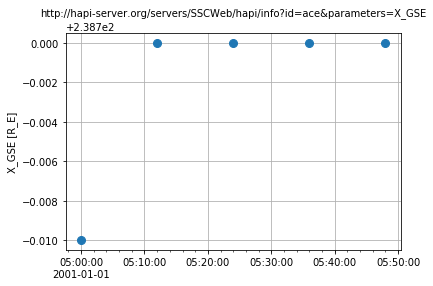

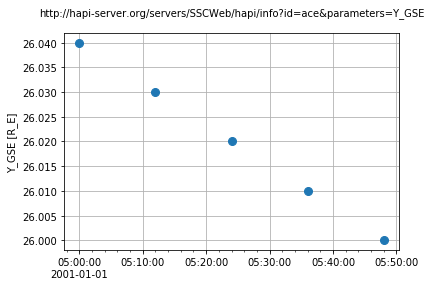

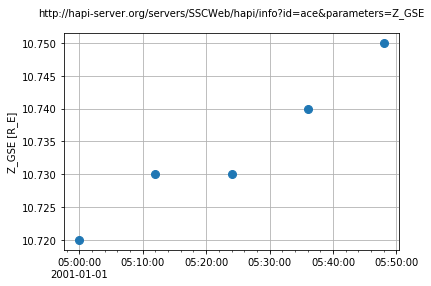

In [72]:
server     = 'http://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'ace'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'X_GSE,Y_GSE,Z_GSE'
opts       = {'logging': True, 'use_cache': False}
data,meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data,meta)

# CDAWeb

## Magnitude and BGSEc from dataset AC_H0_MFI

Reading /Users/robertweigel/git/client-python/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_MagnitudeBGSEc.pkl ... Done.
Reading /Users/robertweigel/git/client-python/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.npy ... Done.


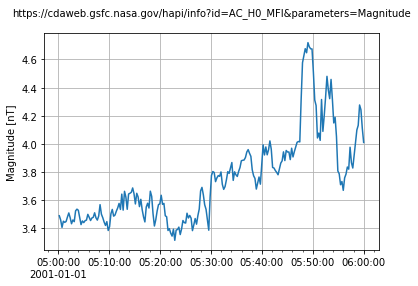

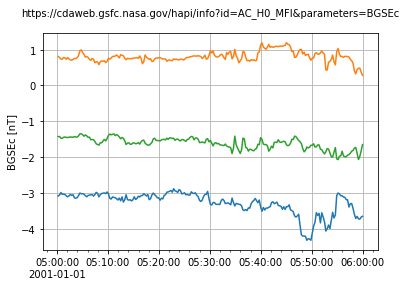

In [31]:
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True, 'use_cache': True}    
data,meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data,meta)

## Metadata for AC_H0_MFI

In [30]:
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
meta = hapi(server,dataset, **opts)
print('Parameters in %s' % dataset)
for i in range(0,len(meta['parameters'])):
    print('  %s' % meta['parameters'][i]['name'])
print('')

Parameters in AC_H0_MFI
  Time
  Magnitude
  BGSEc
  BGSM
  dBrms
  SC_pos_GSE
  SC_pos_GSM



## Metadata for all CDAWeb datasets

In [31]:
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server, **opts)
print('%d CDAWeb datasets' % len(meta['catalog']))
for i in range(0,3):
    print('  %d. %s' % (i,meta['catalog'][i]['id']))
print('  ...')    
print('  %d. %s' % (len(meta['catalog']),meta['catalog'][-1]['id']))
print('')

1769 CDAWeb datasets
  0. A1_K0_MPA
  1. A2_K0_MPA
  2. AC_AT_DEF
  ...
  1769. WI_SW-ION-DIST_SWE-FARADAY

